In [1]:
import pandas as pd 
import numpy as np
import math
import keras
import tensorflow as tf
import progressbar
import os
from os import listdir

## Print Dependencies



Dependences are fundamental to record the computational environment.

In [2]:
%load_ext watermark

# python, ipython, packages, and machine characteristics
%watermark -v -m -p pandas,keras,numpy,math,tensorflow,matplotlib,h5py

# date
print (" ")
%watermark -u -n -t -z

Python implementation: CPython
Python version       : 3.8.8
IPython version      : 7.22.0

pandas    : 1.2.3
keras     : 2.4.3
numpy     : 1.19.5
math      : unknown
tensorflow: 2.4.1
matplotlib: 3.4.0
h5py      : 2.10.0

Compiler    : Clang 12.0.0 (clang-1200.0.32.29)
OS          : Darwin
Release     : 19.6.0
Machine     : x86_64
Processor   : i386
CPU cores   : 8
Architecture: 64bit

 
Last updated: Mon Apr 12 2021 13:15:06CEST



## Load of the data

In [3]:
from process import loaddata
#low = low energy
#high = high energy
class_data0_low = loaddata("../data_old/{}.csv".format('probability'))
class_data0_high = loaddata("../data/{}.csv".format('weight'))

In [4]:
class_data0_low = class_data0_low[class_data0_low[:,0] > 0.0001]
class_data0_high = class_data0_high[class_data0_high[:,0] > 0.0001]

In [5]:
data = []

for class_ in class_data0_low:
    if class_[0] > 0.3 and class_[0] < 0.45:
        for i in range(10):
            data.append(class_) 
    if class_[0] > 0.45 and class_[0] < 0.6:
        for i in range(1000):
            data.append(class_) 
    else: 
        data.append(class_) 

In [6]:
len(data)
class_data_low = []
class_data_low = np.array(data)

In [7]:
data = []
i = 0
j = 0
saved = []
for class_ in class_data0_high:
    if j == 1000000:
        #print(class_[0])
        if class_[0] < 0.002: 
            if i == 50:
                i = 0
                data.append(class_) 
            else:
                i = i + 1
        if class_[0] > 0.003:
            for i in range(10):
                data.append(class_) 
        if class_[0] > 0.005:
            for i in range(30):
                data.append(class_) 
        if class_[0] > 0.007:
            for i in range(50):
                data.append(class_) 
        else: 
            data.append(class_) 
        j = j + 1
    else: 
        j = j + 1

In [8]:
len(data)
class_data_high = []
class_data_high = np.array(data)

In [9]:
np.random.shuffle(class_data_low)
y_low = class_data_low[:,0]
A = class_data_low
print(A[0])
A[:,9] = A[:,13]
print(A[0])
x_low = class_data_low[:,1:10]
print(x_low[0])
print(x_low.shape)

[ 3.17313364e-01  7.87977076e-01 -2.89899188e-01  6.99009964e-01
 -4.30383701e-01  1.40994990e-02  8.95661916e-02  2.46000000e+00
  2.69999999e+09  1.55974671e-01 -9.33914234e-02 -3.34378385e-01
 -2.90375231e-01  3.81700462e-03]
[ 3.17313364e-01  7.87977076e-01 -2.89899188e-01  6.99009964e-01
 -4.30383701e-01  1.40994990e-02  8.95661916e-02  2.46000000e+00
  2.69999999e+09  3.81700462e-03 -9.33914234e-02 -3.34378385e-01
 -2.90375231e-01  3.81700462e-03]
[ 7.87977076e-01 -2.89899188e-01  6.99009964e-01 -4.30383701e-01
  1.40994990e-02  8.95661916e-02  2.46000000e+00  2.69999999e+09
  3.81700462e-03]
(535805, 9)


In [10]:
np.random.shuffle(class_data_high)
y_high = class_data_high[:,0]
A = class_data_high
print(A[0])
A[:,9] = A[:,13]
print(A[0])
x_high = class_data_high[:,1:10]
print(x_high[0])
print(x_high.shape)

[ 4.25059985e-04 -4.11999703e+01  4.22826150e+01 -9.96823156e+00
  2.98617198e+01 -5.95334012e+01 -2.85761809e+01  3.87000000e+07
  1.66200000e+07 -4.96133027e-01 -1.21340127e-01  4.35643161e-01
  4.21174657e-01  2.82316972e-07]
[ 4.25059985e-04 -4.11999703e+01  4.22826150e+01 -9.96823156e+00
  2.98617198e+01 -5.95334012e+01 -2.85761809e+01  3.87000000e+07
  1.66200000e+07  2.82316972e-07 -1.21340127e-01  4.35643161e-01
  4.21174657e-01  2.82316972e-07]
[-4.11999703e+01  4.22826150e+01 -9.96823156e+00  2.98617198e+01
 -5.95334012e+01 -2.85761809e+01  3.87000000e+07  1.66200000e+07
  2.82316972e-07]
(1, 9)


In [11]:
print(class_data_low.shape)
print(class_data0_low.shape)
print(class_data_high.shape)
print(class_data0_high.shape)

(535805, 14)
(135911, 14)
(1, 14)
(1159974, 14)


In [12]:
x = np.vstack((x_low, x_high))
y = np.hstack((y_low, y_high))

In [13]:
x.shape

(535806, 9)

In [14]:
y.shape

(535806,)

In [15]:
train_split = 0.75
train_limit = int(len(y)*train_split)
print("Training sample: {0} \nValuation sample: {1}".format(train_limit, len(y)-train_limit))

Training sample: 401854 
Valuation sample: 133952


In [16]:
x_train = x[:train_limit]
x_val = x[train_limit:]

y_train = y[:train_limit]
y_val = y[train_limit:]

## Model Build

In [17]:
from keras.models import Sequential
from keras.layers.core import Dense
import keras.backend as K
from keras import optimizers
from keras import models
from keras import layers
from keras.layers.normalization import BatchNormalization

In [18]:
def build_model() :
    model = models.Sequential()
    model.add (BatchNormalization(input_dim = 9))
    model.add (layers.Dense (18 , activation = "sigmoid"))
    model.add (layers.Dense (18 , activation = "relu"))
    model.add (layers.Dense (1 , activation = "sigmoid"))
    model.compile(optimizer = "adam" , loss = 'mae' , metrics = ["mape"])
    return model

In [19]:
model = build_model ()
history = model.fit ( x_train, y_train, epochs = 3000, batch_size = 10000000 , validation_data = (x_val, y_val) )
model.save("../models/classifier/{}_noposition.h5".format('probability'))

Epoch 1/3000
1/1 [==============================] - 1s 1s/step - loss: 0.1273 - mape: 184.8909 - val_loss: 0.1384 - val_mape: 212.1995
Epoch 2/3000
1/1 [==============================] - 0s 135ms/step - loss: 0.1220 - mape: 180.8341 - val_loss: 0.1320 - val_mape: 205.7487
Epoch 3/3000
1/1 [==============================] - 0s 136ms/step - loss: 0.1174 - mape: 176.9396 - val_loss: 0.1263 - val_mape: 200.0144
Epoch 4/3000
1/1 [==============================] - 0s 137ms/step - loss: 0.1136 - mape: 173.2513 - val_loss: 0.1213 - val_mape: 194.8420
Epoch 5/3000
1/1 [==============================] - 0s 139ms/step - loss: 0.1107 - mape: 169.8372 - val_loss: 0.1175 - val_mape: 190.2351
Epoch 6/3000
1/1 [==============================] - 0s 141ms/step - loss: 0.1089 - mape: 166.7531 - val_loss: 0.1147 - val_mape: 186.1704
Epoch 7/3000
1/1 [==============================] - 0s 140ms/step - loss: 0.1080 - mape: 164.0465 - val_loss: 0.1131 - val_mape: 182.7531
Epoch 8/3000
1/1 [===================

1/1 [==============================] - 0s 132ms/step - loss: 0.0970 - mape: 146.1025 - val_loss: 0.1085 - val_mape: 169.9792
Epoch 61/3000
1/1 [==============================] - 0s 129ms/step - loss: 0.0968 - mape: 145.7212 - val_loss: 0.1084 - val_mape: 169.7541
Epoch 62/3000
1/1 [==============================] - 0s 137ms/step - loss: 0.0966 - mape: 145.4162 - val_loss: 0.1083 - val_mape: 169.6167
Epoch 63/3000
1/1 [==============================] - 0s 130ms/step - loss: 0.0964 - mape: 145.1758 - val_loss: 0.1082 - val_mape: 169.5491
Epoch 64/3000
1/1 [==============================] - 0s 130ms/step - loss: 0.0962 - mape: 144.9866 - val_loss: 0.1082 - val_mape: 169.5313
Epoch 65/3000
1/1 [==============================] - 0s 135ms/step - loss: 0.0960 - mape: 144.8345 - val_loss: 0.1082 - val_mape: 169.5344
Epoch 66/3000
1/1 [==============================] - 0s 131ms/step - loss: 0.0958 - mape: 144.6965 - val_loss: 0.1082 - val_mape: 169.5095
Epoch 67/3000
1/1 [======================

Epoch 119/3000
1/1 [==============================] - 0s 139ms/step - loss: 0.0823 - mape: 128.0168 - val_loss: 0.1012 - val_mape: 158.2623
Epoch 120/3000
1/1 [==============================] - 0s 133ms/step - loss: 0.0820 - mape: 127.6251 - val_loss: 0.1010 - val_mape: 157.9557
Epoch 121/3000
1/1 [==============================] - 0s 131ms/step - loss: 0.0817 - mape: 127.2391 - val_loss: 0.1008 - val_mape: 157.6633
Epoch 122/3000
1/1 [==============================] - 0s 128ms/step - loss: 0.0814 - mape: 126.8650 - val_loss: 0.1006 - val_mape: 157.3751
Epoch 123/3000
1/1 [==============================] - 0s 132ms/step - loss: 0.0811 - mape: 126.4956 - val_loss: 0.1003 - val_mape: 157.0797
Epoch 124/3000
1/1 [==============================] - 0s 137ms/step - loss: 0.0808 - mape: 126.1242 - val_loss: 0.1001 - val_mape: 156.7874
Epoch 125/3000
1/1 [==============================] - 0s 130ms/step - loss: 0.0805 - mape: 125.7582 - val_loss: 0.0999 - val_mape: 156.4710
Epoch 126/3000
1/1 [

1/1 [==============================] - 0s 128ms/step - loss: 0.0691 - mape: 110.9749 - val_loss: 0.0883 - val_mape: 143.3269
Epoch 178/3000
1/1 [==============================] - 0s 141ms/step - loss: 0.0689 - mape: 110.6915 - val_loss: 0.0880 - val_mape: 142.9312
Epoch 179/3000
1/1 [==============================] - 0s 123ms/step - loss: 0.0687 - mape: 110.3656 - val_loss: 0.0876 - val_mape: 142.5192
Epoch 180/3000
1/1 [==============================] - 0s 132ms/step - loss: 0.0686 - mape: 110.0294 - val_loss: 0.0873 - val_mape: 142.1283
Epoch 181/3000
1/1 [==============================] - 0s 125ms/step - loss: 0.0684 - mape: 109.7094 - val_loss: 0.0871 - val_mape: 141.7961
Epoch 182/3000
1/1 [==============================] - 0s 123ms/step - loss: 0.0682 - mape: 109.4326 - val_loss: 0.0869 - val_mape: 141.5303
Epoch 183/3000
1/1 [==============================] - 0s 130ms/step - loss: 0.0681 - mape: 109.2012 - val_loss: 0.0868 - val_mape: 141.2846
Epoch 184/3000
1/1 [===============

Epoch 236/3000
1/1 [==============================] - 0s 134ms/step - loss: 0.0595 - mape: 97.5917 - val_loss: 0.0747 - val_mape: 125.2997
Epoch 237/3000
1/1 [==============================] - 0s 139ms/step - loss: 0.0593 - mape: 97.3865 - val_loss: 0.0745 - val_mape: 125.0399
Epoch 238/3000
1/1 [==============================] - 0s 134ms/step - loss: 0.0592 - mape: 97.2144 - val_loss: 0.0743 - val_mape: 124.8364
Epoch 239/3000
1/1 [==============================] - 0s 135ms/step - loss: 0.0591 - mape: 97.0780 - val_loss: 0.0742 - val_mape: 124.6932
Epoch 240/3000
1/1 [==============================] - 0s 130ms/step - loss: 0.0589 - mape: 96.9805 - val_loss: 0.0741 - val_mape: 124.4729
Epoch 241/3000
1/1 [==============================] - 0s 135ms/step - loss: 0.0588 - mape: 96.8390 - val_loss: 0.0737 - val_mape: 124.1116
Epoch 242/3000
1/1 [==============================] - 0s 140ms/step - loss: 0.0586 - mape: 96.6111 - val_loss: 0.0733 - val_mape: 123.6580
Epoch 243/3000
1/1 [=======

Epoch 295/3000
1/1 [==============================] - 0s 138ms/step - loss: 0.0525 - mape: 87.7499 - val_loss: 0.0614 - val_mape: 108.3996
Epoch 296/3000
1/1 [==============================] - 0s 127ms/step - loss: 0.0524 - mape: 87.6175 - val_loss: 0.0612 - val_mape: 108.1361
Epoch 297/3000
1/1 [==============================] - 0s 139ms/step - loss: 0.0523 - mape: 87.4739 - val_loss: 0.0611 - val_mape: 107.8955
Epoch 298/3000
1/1 [==============================] - 0s 139ms/step - loss: 0.0522 - mape: 87.3407 - val_loss: 0.0609 - val_mape: 107.6404
Epoch 299/3000
1/1 [==============================] - 0s 130ms/step - loss: 0.0521 - mape: 87.1967 - val_loss: 0.0607 - val_mape: 107.3767
Epoch 300/3000
1/1 [==============================] - 0s 138ms/step - loss: 0.0520 - mape: 87.0478 - val_loss: 0.0605 - val_mape: 107.1184
Epoch 301/3000
1/1 [==============================] - 0s 140ms/step - loss: 0.0519 - mape: 86.9035 - val_loss: 0.0604 - val_mape: 106.8813
Epoch 302/3000
1/1 [=======

1/1 [==============================] - 0s 137ms/step - loss: 0.0474 - mape: 79.8249 - val_loss: 0.0520 - val_mape: 93.4956
Epoch 355/3000
1/1 [==============================] - 0s 138ms/step - loss: 0.0474 - mape: 79.7658 - val_loss: 0.0519 - val_mape: 93.4127
Epoch 356/3000
1/1 [==============================] - 0s 133ms/step - loss: 0.0473 - mape: 79.7531 - val_loss: 0.0519 - val_mape: 93.3424
Epoch 357/3000
1/1 [==============================] - 0s 140ms/step - loss: 0.0472 - mape: 79.7479 - val_loss: 0.0519 - val_mape: 93.2201
Epoch 358/3000
1/1 [==============================] - 0s 141ms/step - loss: 0.0472 - mape: 79.7066 - val_loss: 0.0517 - val_mape: 92.9465
Epoch 359/3000
1/1 [==============================] - 0s 137ms/step - loss: 0.0471 - mape: 79.5605 - val_loss: 0.0514 - val_mape: 92.6288
Epoch 360/3000
1/1 [==============================] - 0s 137ms/step - loss: 0.0470 - mape: 79.3853 - val_loss: 0.0513 - val_mape: 92.4273
Epoch 361/3000
1/1 [=============================

1/1 [==============================] - 0s 147ms/step - loss: 0.0435 - mape: 74.8292 - val_loss: 0.0461 - val_mape: 83.8509
Epoch 414/3000
1/1 [==============================] - 0s 132ms/step - loss: 0.0435 - mape: 74.6961 - val_loss: 0.0460 - val_mape: 83.6272
Epoch 415/3000
1/1 [==============================] - 0s 134ms/step - loss: 0.0434 - mape: 74.5496 - val_loss: 0.0459 - val_mape: 83.4749
Epoch 416/3000
1/1 [==============================] - 0s 125ms/step - loss: 0.0433 - mape: 74.4535 - val_loss: 0.0459 - val_mape: 83.3910
Epoch 417/3000
1/1 [==============================] - 0s 133ms/step - loss: 0.0433 - mape: 74.4053 - val_loss: 0.0459 - val_mape: 83.3213
Epoch 418/3000
1/1 [==============================] - 0s 127ms/step - loss: 0.0432 - mape: 74.3677 - val_loss: 0.0457 - val_mape: 83.0568
Epoch 419/3000
1/1 [==============================] - 0s 133ms/step - loss: 0.0431 - mape: 74.1906 - val_loss: 0.0456 - val_mape: 82.8566
Epoch 420/3000
1/1 [=============================

1/1 [==============================] - 0s 132ms/step - loss: 0.0391 - mape: 69.9971 - val_loss: 0.0406 - val_mape: 76.2299
Epoch 473/3000
1/1 [==============================] - 0s 142ms/step - loss: 0.0391 - mape: 69.8594 - val_loss: 0.0406 - val_mape: 76.1947
Epoch 474/3000
1/1 [==============================] - 0s 124ms/step - loss: 0.0390 - mape: 69.8333 - val_loss: 0.0407 - val_mape: 76.2002
Epoch 475/3000
1/1 [==============================] - 0s 133ms/step - loss: 0.0390 - mape: 69.8381 - val_loss: 0.0405 - val_mape: 75.9442
Epoch 476/3000
1/1 [==============================] - 0s 138ms/step - loss: 0.0389 - mape: 69.6379 - val_loss: 0.0403 - val_mape: 75.6613
Epoch 477/3000
1/1 [==============================] - 0s 131ms/step - loss: 0.0388 - mape: 69.4167 - val_loss: 0.0403 - val_mape: 75.5665
Epoch 478/3000
1/1 [==============================] - 0s 135ms/step - loss: 0.0388 - mape: 69.3395 - val_loss: 0.0403 - val_mape: 75.5621
Epoch 479/3000
1/1 [=============================

1/1 [==============================] - 0s 130ms/step - loss: 0.0367 - mape: 66.1346 - val_loss: 0.0380 - val_mape: 71.0911
Epoch 532/3000
1/1 [==============================] - 0s 130ms/step - loss: 0.0367 - mape: 65.9800 - val_loss: 0.0379 - val_mape: 70.9111
Epoch 533/3000
1/1 [==============================] - 0s 127ms/step - loss: 0.0367 - mape: 65.8421 - val_loss: 0.0379 - val_mape: 70.9428
Epoch 534/3000
1/1 [==============================] - 0s 130ms/step - loss: 0.0366 - mape: 65.8764 - val_loss: 0.0379 - val_mape: 71.0547
Epoch 535/3000
1/1 [==============================] - 0s 131ms/step - loss: 0.0366 - mape: 65.9791 - val_loss: 0.0378 - val_mape: 70.8539
Epoch 536/3000
1/1 [==============================] - 0s 130ms/step - loss: 0.0366 - mape: 65.8209 - val_loss: 0.0377 - val_mape: 70.6541
Epoch 537/3000
1/1 [==============================] - 0s 136ms/step - loss: 0.0366 - mape: 65.6674 - val_loss: 0.0378 - val_mape: 70.8455
Epoch 538/3000
1/1 [=============================

1/1 [==============================] - 0s 139ms/step - loss: 0.0350 - mape: 62.7249 - val_loss: 0.0362 - val_mape: 67.6796
Epoch 591/3000
1/1 [==============================] - 0s 132ms/step - loss: 0.0350 - mape: 62.8601 - val_loss: 0.0362 - val_mape: 67.5790
Epoch 592/3000
1/1 [==============================] - 0s 139ms/step - loss: 0.0350 - mape: 62.7665 - val_loss: 0.0361 - val_mape: 67.3980
Epoch 593/3000
1/1 [==============================] - 0s 142ms/step - loss: 0.0349 - mape: 62.6039 - val_loss: 0.0361 - val_mape: 67.3633
Epoch 594/3000
1/1 [==============================] - 0s 130ms/step - loss: 0.0349 - mape: 62.5646 - val_loss: 0.0361 - val_mape: 67.3008
Epoch 595/3000
1/1 [==============================] - 0s 125ms/step - loss: 0.0349 - mape: 62.5038 - val_loss: 0.0361 - val_mape: 67.2111
Epoch 596/3000
1/1 [==============================] - 0s 133ms/step - loss: 0.0349 - mape: 62.4175 - val_loss: 0.0361 - val_mape: 67.1525
Epoch 597/3000
1/1 [=============================

1/1 [==============================] - 0s 136ms/step - loss: 0.0335 - mape: 58.9211 - val_loss: 0.0347 - val_mape: 62.8256
Epoch 650/3000
1/1 [==============================] - 0s 143ms/step - loss: 0.0335 - mape: 58.8119 - val_loss: 0.0347 - val_mape: 62.7817
Epoch 651/3000
1/1 [==============================] - 0s 132ms/step - loss: 0.0334 - mape: 58.7605 - val_loss: 0.0346 - val_mape: 62.4731
Epoch 652/3000
1/1 [==============================] - 0s 133ms/step - loss: 0.0334 - mape: 58.4808 - val_loss: 0.0346 - val_mape: 62.5201
Epoch 653/3000
1/1 [==============================] - 0s 133ms/step - loss: 0.0334 - mape: 58.5132 - val_loss: 0.0347 - val_mape: 62.7209
Epoch 654/3000
1/1 [==============================] - 0s 139ms/step - loss: 0.0334 - mape: 58.6991 - val_loss: 0.0345 - val_mape: 62.2913
Epoch 655/3000
1/1 [==============================] - 0s 137ms/step - loss: 0.0334 - mape: 58.3302 - val_loss: 0.0345 - val_mape: 62.1690
Epoch 656/3000
1/1 [=============================

1/1 [==============================] - 0s 140ms/step - loss: 0.0321 - mape: 55.0600 - val_loss: 0.0330 - val_mape: 58.7165
Epoch 709/3000
1/1 [==============================] - 0s 137ms/step - loss: 0.0320 - mape: 54.8792 - val_loss: 0.0330 - val_mape: 58.7116
Epoch 710/3000
1/1 [==============================] - 0s 134ms/step - loss: 0.0320 - mape: 54.8784 - val_loss: 0.0330 - val_mape: 58.6426
Epoch 711/3000
1/1 [==============================] - 0s 180ms/step - loss: 0.0320 - mape: 54.8182 - val_loss: 0.0329 - val_mape: 58.4495
Epoch 712/3000
1/1 [==============================] - 0s 160ms/step - loss: 0.0320 - mape: 54.6477 - val_loss: 0.0329 - val_mape: 58.4550
Epoch 713/3000
1/1 [==============================] - 0s 139ms/step - loss: 0.0319 - mape: 54.6483 - val_loss: 0.0329 - val_mape: 58.5161
Epoch 714/3000
1/1 [==============================] - 0s 163ms/step - loss: 0.0319 - mape: 54.7037 - val_loss: 0.0329 - val_mape: 58.2896
Epoch 715/3000
1/1 [=============================

1/1 [==============================] - 0s 147ms/step - loss: 0.0307 - mape: 51.4230 - val_loss: 0.0313 - val_mape: 54.2228
Epoch 768/3000
1/1 [==============================] - 0s 144ms/step - loss: 0.0306 - mape: 51.3104 - val_loss: 0.0314 - val_mape: 54.2584
Epoch 769/3000
1/1 [==============================] - 0s 153ms/step - loss: 0.0306 - mape: 51.3421 - val_loss: 0.0313 - val_mape: 54.0914
Epoch 770/3000
1/1 [==============================] - 0s 143ms/step - loss: 0.0306 - mape: 51.1970 - val_loss: 0.0313 - val_mape: 53.9235
Epoch 771/3000
1/1 [==============================] - 0s 151ms/step - loss: 0.0306 - mape: 51.0511 - val_loss: 0.0313 - val_mape: 54.0736
Epoch 772/3000
1/1 [==============================] - 0s 141ms/step - loss: 0.0306 - mape: 51.1911 - val_loss: 0.0312 - val_mape: 53.7923
Epoch 773/3000
1/1 [==============================] - 0s 143ms/step - loss: 0.0306 - mape: 50.9366 - val_loss: 0.0312 - val_mape: 53.7363
Epoch 774/3000
1/1 [=============================

1/1 [==============================] - 0s 141ms/step - loss: 0.0295 - mape: 47.4085 - val_loss: 0.0298 - val_mape: 49.7410
Epoch 827/3000
1/1 [==============================] - 0s 185ms/step - loss: 0.0294 - mape: 47.4115 - val_loss: 0.0298 - val_mape: 49.7824
Epoch 828/3000
1/1 [==============================] - 0s 132ms/step - loss: 0.0294 - mape: 47.4493 - val_loss: 0.0298 - val_mape: 49.5310
Epoch 829/3000
1/1 [==============================] - 0s 138ms/step - loss: 0.0294 - mape: 47.2145 - val_loss: 0.0298 - val_mape: 49.5643
Epoch 830/3000
1/1 [==============================] - 0s 133ms/step - loss: 0.0294 - mape: 47.2345 - val_loss: 0.0297 - val_mape: 49.4498
Epoch 831/3000
1/1 [==============================] - 0s 148ms/step - loss: 0.0294 - mape: 47.1236 - val_loss: 0.0297 - val_mape: 49.4125
Epoch 832/3000
1/1 [==============================] - 0s 168ms/step - loss: 0.0293 - mape: 47.0852 - val_loss: 0.0297 - val_mape: 49.2952
Epoch 833/3000
1/1 [=============================

1/1 [==============================] - 0s 143ms/step - loss: 0.0283 - mape: 43.4245 - val_loss: 0.0284 - val_mape: 45.3779
Epoch 886/3000
1/1 [==============================] - 0s 142ms/step - loss: 0.0282 - mape: 43.2326 - val_loss: 0.0284 - val_mape: 45.2843
Epoch 887/3000
1/1 [==============================] - 0s 136ms/step - loss: 0.0282 - mape: 43.1439 - val_loss: 0.0284 - val_mape: 45.3731
Epoch 888/3000
1/1 [==============================] - 0s 139ms/step - loss: 0.0282 - mape: 43.2316 - val_loss: 0.0284 - val_mape: 45.1336
Epoch 889/3000
1/1 [==============================] - 0s 138ms/step - loss: 0.0282 - mape: 43.0040 - val_loss: 0.0283 - val_mape: 45.0973
Epoch 890/3000
1/1 [==============================] - 0s 137ms/step - loss: 0.0281 - mape: 42.9726 - val_loss: 0.0283 - val_mape: 45.0591
Epoch 891/3000
1/1 [==============================] - 0s 141ms/step - loss: 0.0281 - mape: 42.9401 - val_loss: 0.0283 - val_mape: 44.9092
Epoch 892/3000
1/1 [=============================

1/1 [==============================] - 0s 142ms/step - loss: 0.0270 - mape: 39.1518 - val_loss: 0.0271 - val_mape: 40.8198
Epoch 945/3000
1/1 [==============================] - 0s 136ms/step - loss: 0.0270 - mape: 39.0048 - val_loss: 0.0271 - val_mape: 40.8436
Epoch 946/3000
1/1 [==============================] - 0s 132ms/step - loss: 0.0270 - mape: 39.0319 - val_loss: 0.0271 - val_mape: 40.6005
Epoch 947/3000
1/1 [==============================] - 0s 136ms/step - loss: 0.0270 - mape: 38.8009 - val_loss: 0.0270 - val_mape: 40.6697
Epoch 948/3000
1/1 [==============================] - 0s 134ms/step - loss: 0.0269 - mape: 38.8684 - val_loss: 0.0270 - val_mape: 40.4951
Epoch 949/3000
1/1 [==============================] - 0s 137ms/step - loss: 0.0269 - mape: 38.7016 - val_loss: 0.0270 - val_mape: 40.4530
Epoch 950/3000
1/1 [==============================] - 0s 141ms/step - loss: 0.0269 - mape: 38.6629 - val_loss: 0.0270 - val_mape: 40.4639
Epoch 951/3000
1/1 [=============================

1/1 [==============================] - 0s 144ms/step - loss: 0.0258 - mape: 34.8006 - val_loss: 0.0258 - val_mape: 36.3766
Epoch 1004/3000
1/1 [==============================] - 0s 141ms/step - loss: 0.0258 - mape: 34.8020 - val_loss: 0.0259 - val_mape: 36.5601
Epoch 1005/3000
1/1 [==============================] - 0s 136ms/step - loss: 0.0259 - mape: 34.9906 - val_loss: 0.0258 - val_mape: 36.2671
Epoch 1006/3000
1/1 [==============================] - 0s 135ms/step - loss: 0.0258 - mape: 34.7039 - val_loss: 0.0258 - val_mape: 36.1402
Epoch 1007/3000
1/1 [==============================] - 0s 139ms/step - loss: 0.0258 - mape: 34.5896 - val_loss: 0.0258 - val_mape: 36.4680
Epoch 1008/3000
1/1 [==============================] - 0s 131ms/step - loss: 0.0258 - mape: 34.9217 - val_loss: 0.0257 - val_mape: 36.1468
Epoch 1009/3000
1/1 [==============================] - 0s 127ms/step - loss: 0.0257 - mape: 34.6149 - val_loss: 0.0258 - val_mape: 35.8799
Epoch 1010/3000
1/1 [======================

1/1 [==============================] - 0s 134ms/step - loss: 0.0248 - mape: 31.4432 - val_loss: 0.0247 - val_mape: 32.9266
Epoch 1063/3000
1/1 [==============================] - 0s 131ms/step - loss: 0.0247 - mape: 31.5918 - val_loss: 0.0247 - val_mape: 32.7728
Epoch 1064/3000
1/1 [==============================] - 0s 125ms/step - loss: 0.0247 - mape: 31.4444 - val_loss: 0.0247 - val_mape: 32.6797
Epoch 1065/3000
1/1 [==============================] - 0s 130ms/step - loss: 0.0247 - mape: 31.3575 - val_loss: 0.0247 - val_mape: 32.7540
Epoch 1066/3000
1/1 [==============================] - 0s 132ms/step - loss: 0.0247 - mape: 31.4373 - val_loss: 0.0246 - val_mape: 32.5595
Epoch 1067/3000
1/1 [==============================] - 0s 134ms/step - loss: 0.0247 - mape: 31.2497 - val_loss: 0.0246 - val_mape: 32.4870
Epoch 1068/3000
1/1 [==============================] - 0s 128ms/step - loss: 0.0246 - mape: 31.1836 - val_loss: 0.0246 - val_mape: 32.5370
Epoch 1069/3000
1/1 [======================

1/1 [==============================] - 0s 129ms/step - loss: 0.0238 - mape: 28.6173 - val_loss: 0.0238 - val_mape: 29.8396
Epoch 1122/3000
1/1 [==============================] - 0s 133ms/step - loss: 0.0238 - mape: 28.7032 - val_loss: 0.0237 - val_mape: 29.4756
Epoch 1123/3000
1/1 [==============================] - 0s 130ms/step - loss: 0.0238 - mape: 28.3368 - val_loss: 0.0237 - val_mape: 29.3847
Epoch 1124/3000
1/1 [==============================] - 0s 136ms/step - loss: 0.0238 - mape: 28.2462 - val_loss: 0.0237 - val_mape: 29.6244
Epoch 1125/3000
1/1 [==============================] - 0s 137ms/step - loss: 0.0237 - mape: 28.4873 - val_loss: 0.0236 - val_mape: 29.5171
Epoch 1126/3000
1/1 [==============================] - 0s 134ms/step - loss: 0.0237 - mape: 28.3826 - val_loss: 0.0237 - val_mape: 29.2400
Epoch 1127/3000
1/1 [==============================] - 0s 124ms/step - loss: 0.0238 - mape: 28.1079 - val_loss: 0.0236 - val_mape: 29.4044
Epoch 1128/3000
1/1 [======================

1/1 [==============================] - 0s 141ms/step - loss: 0.0228 - mape: 25.9592 - val_loss: 0.0228 - val_mape: 27.1531
Epoch 1181/3000
1/1 [==============================] - 0s 134ms/step - loss: 0.0228 - mape: 26.0724 - val_loss: 0.0227 - val_mape: 27.0647
Epoch 1182/3000
1/1 [==============================] - 0s 139ms/step - loss: 0.0228 - mape: 25.9881 - val_loss: 0.0227 - val_mape: 26.9097
Epoch 1183/3000
1/1 [==============================] - 0s 132ms/step - loss: 0.0228 - mape: 25.8362 - val_loss: 0.0227 - val_mape: 26.9020
Epoch 1184/3000
1/1 [==============================] - 0s 132ms/step - loss: 0.0228 - mape: 25.8312 - val_loss: 0.0227 - val_mape: 26.9010
Epoch 1185/3000
1/1 [==============================] - 0s 130ms/step - loss: 0.0227 - mape: 25.8312 - val_loss: 0.0227 - val_mape: 26.8589
Epoch 1186/3000
1/1 [==============================] - 0s 134ms/step - loss: 0.0227 - mape: 25.7896 - val_loss: 0.0227 - val_mape: 26.7806
Epoch 1187/3000
1/1 [======================

1/1 [==============================] - 0s 129ms/step - loss: 0.0220 - mape: 23.7135 - val_loss: 0.0219 - val_mape: 25.0047
Epoch 1240/3000
1/1 [==============================] - 0s 130ms/step - loss: 0.0220 - mape: 23.8172 - val_loss: 0.0219 - val_mape: 24.9434
Epoch 1241/3000
1/1 [==============================] - 0s 128ms/step - loss: 0.0220 - mape: 23.7581 - val_loss: 0.0219 - val_mape: 24.8059
Epoch 1242/3000
1/1 [==============================] - 0s 138ms/step - loss: 0.0220 - mape: 23.6252 - val_loss: 0.0219 - val_mape: 24.8640
Epoch 1243/3000
1/1 [==============================] - 0s 145ms/step - loss: 0.0219 - mape: 23.6794 - val_loss: 0.0219 - val_mape: 24.8443
Epoch 1244/3000
1/1 [==============================] - 0s 131ms/step - loss: 0.0219 - mape: 23.6609 - val_loss: 0.0219 - val_mape: 24.6507
Epoch 1245/3000
1/1 [==============================] - 0s 140ms/step - loss: 0.0219 - mape: 23.4725 - val_loss: 0.0218 - val_mape: 24.6815
Epoch 1246/3000
1/1 [======================

1/1 [==============================] - 0s 134ms/step - loss: 0.0213 - mape: 21.9664 - val_loss: 0.0211 - val_mape: 23.2710
Epoch 1299/3000
1/1 [==============================] - 0s 136ms/step - loss: 0.0212 - mape: 21.8255 - val_loss: 0.0211 - val_mape: 23.2355
Epoch 1300/3000
1/1 [==============================] - 0s 130ms/step - loss: 0.0212 - mape: 21.7907 - val_loss: 0.0212 - val_mape: 23.3807
Epoch 1301/3000
1/1 [==============================] - 0s 130ms/step - loss: 0.0212 - mape: 21.9316 - val_loss: 0.0211 - val_mape: 23.1748
Epoch 1302/3000
1/1 [==============================] - 0s 132ms/step - loss: 0.0212 - mape: 21.7363 - val_loss: 0.0211 - val_mape: 23.2013
Epoch 1303/3000
1/1 [==============================] - 0s 134ms/step - loss: 0.0212 - mape: 21.7626 - val_loss: 0.0211 - val_mape: 23.0820
Epoch 1304/3000
1/1 [==============================] - 0s 136ms/step - loss: 0.0212 - mape: 21.6460 - val_loss: 0.0211 - val_mape: 23.1725
Epoch 1305/3000
1/1 [======================

1/1 [==============================] - 0s 137ms/step - loss: 0.0206 - mape: 20.3512 - val_loss: 0.0207 - val_mape: 21.6115
Epoch 1358/3000
1/1 [==============================] - 0s 140ms/step - loss: 0.0207 - mape: 20.1826 - val_loss: 0.0205 - val_mape: 21.7962
Epoch 1359/3000
1/1 [==============================] - 0s 136ms/step - loss: 0.0206 - mape: 20.3571 - val_loss: 0.0205 - val_mape: 21.7636
Epoch 1360/3000
1/1 [==============================] - 0s 139ms/step - loss: 0.0206 - mape: 20.3252 - val_loss: 0.0206 - val_mape: 21.5601
Epoch 1361/3000
1/1 [==============================] - 0s 130ms/step - loss: 0.0207 - mape: 20.1323 - val_loss: 0.0205 - val_mape: 21.6451
Epoch 1362/3000
1/1 [==============================] - 0s 140ms/step - loss: 0.0205 - mape: 20.2078 - val_loss: 0.0206 - val_mape: 21.8079
Epoch 1363/3000
1/1 [==============================] - 0s 135ms/step - loss: 0.0207 - mape: 20.3606 - val_loss: 0.0205 - val_mape: 21.5239
Epoch 1364/3000
1/1 [======================

1/1 [==============================] - 0s 144ms/step - loss: 0.0201 - mape: 19.1963 - val_loss: 0.0200 - val_mape: 20.5921
Epoch 1417/3000
1/1 [==============================] - 0s 134ms/step - loss: 0.0201 - mape: 19.1729 - val_loss: 0.0200 - val_mape: 20.5421
Epoch 1418/3000
1/1 [==============================] - 0s 139ms/step - loss: 0.0201 - mape: 19.1259 - val_loss: 0.0200 - val_mape: 20.6150
Epoch 1419/3000
1/1 [==============================] - 0s 133ms/step - loss: 0.0201 - mape: 19.1952 - val_loss: 0.0200 - val_mape: 20.5384
Epoch 1420/3000
1/1 [==============================] - 0s 141ms/step - loss: 0.0200 - mape: 19.1223 - val_loss: 0.0200 - val_mape: 20.5336
Epoch 1421/3000
1/1 [==============================] - 0s 139ms/step - loss: 0.0200 - mape: 19.1175 - val_loss: 0.0200 - val_mape: 20.5762
Epoch 1422/3000
1/1 [==============================] - 0s 140ms/step - loss: 0.0200 - mape: 19.1566 - val_loss: 0.0200 - val_mape: 20.5189
Epoch 1423/3000
1/1 [======================

1/1 [==============================] - 0s 134ms/step - loss: 0.0197 - mape: 18.2764 - val_loss: 0.0196 - val_mape: 19.4255
Epoch 1476/3000
1/1 [==============================] - 0s 146ms/step - loss: 0.0197 - mape: 18.3903 - val_loss: 0.0196 - val_mape: 19.4029
Epoch 1477/3000
1/1 [==============================] - 0s 135ms/step - loss: 0.0196 - mape: 18.3682 - val_loss: 0.0196 - val_mape: 19.3037
Epoch 1478/3000
1/1 [==============================] - 0s 136ms/step - loss: 0.0197 - mape: 18.2729 - val_loss: 0.0196 - val_mape: 19.4430
Epoch 1479/3000
1/1 [==============================] - 0s 130ms/step - loss: 0.0196 - mape: 18.4056 - val_loss: 0.0195 - val_mape: 19.4301
Epoch 1480/3000
1/1 [==============================] - 0s 140ms/step - loss: 0.0196 - mape: 18.3936 - val_loss: 0.0196 - val_mape: 19.3004
Epoch 1481/3000
1/1 [==============================] - 0s 136ms/step - loss: 0.0196 - mape: 18.2709 - val_loss: 0.0195 - val_mape: 19.3178
Epoch 1482/3000
1/1 [======================

1/1 [==============================] - 0s 144ms/step - loss: 0.0192 - mape: 17.7053 - val_loss: 0.0192 - val_mape: 18.7184
Epoch 1535/3000
1/1 [==============================] - 0s 137ms/step - loss: 0.0192 - mape: 17.7145 - val_loss: 0.0192 - val_mape: 18.7395
Epoch 1536/3000
1/1 [==============================] - 0s 140ms/step - loss: 0.0192 - mape: 17.7357 - val_loss: 0.0192 - val_mape: 18.6173
Epoch 1537/3000
1/1 [==============================] - 0s 141ms/step - loss: 0.0192 - mape: 17.6186 - val_loss: 0.0191 - val_mape: 18.6907
Epoch 1538/3000
1/1 [==============================] - 0s 139ms/step - loss: 0.0192 - mape: 17.6866 - val_loss: 0.0191 - val_mape: 18.6666
Epoch 1539/3000
1/1 [==============================] - 0s 143ms/step - loss: 0.0192 - mape: 17.6622 - val_loss: 0.0192 - val_mape: 18.6111
Epoch 1540/3000
1/1 [==============================] - 0s 140ms/step - loss: 0.0192 - mape: 17.6087 - val_loss: 0.0191 - val_mape: 18.6996
Epoch 1541/3000
1/1 [======================

1/1 [==============================] - 0s 139ms/step - loss: 0.0189 - mape: 17.0803 - val_loss: 0.0188 - val_mape: 18.1391
Epoch 1594/3000
1/1 [==============================] - 0s 131ms/step - loss: 0.0189 - mape: 17.1662 - val_loss: 0.0189 - val_mape: 18.1924
Epoch 1595/3000
1/1 [==============================] - 0s 121ms/step - loss: 0.0189 - mape: 17.2156 - val_loss: 0.0190 - val_mape: 17.9930
Epoch 1596/3000
1/1 [==============================] - 0s 131ms/step - loss: 0.0190 - mape: 17.0279 - val_loss: 0.0188 - val_mape: 18.1871
Epoch 1597/3000
1/1 [==============================] - 0s 137ms/step - loss: 0.0189 - mape: 17.2122 - val_loss: 0.0188 - val_mape: 18.1714
Epoch 1598/3000
1/1 [==============================] - 0s 138ms/step - loss: 0.0189 - mape: 17.1983 - val_loss: 0.0189 - val_mape: 18.0296
Epoch 1599/3000
1/1 [==============================] - 0s 138ms/step - loss: 0.0189 - mape: 17.0638 - val_loss: 0.0188 - val_mape: 18.1587
Epoch 1600/3000
1/1 [======================

1/1 [==============================] - 0s 138ms/step - loss: 0.0185 - mape: 16.6901 - val_loss: 0.0185 - val_mape: 17.6015
Epoch 1653/3000
1/1 [==============================] - 0s 136ms/step - loss: 0.0185 - mape: 16.6506 - val_loss: 0.0185 - val_mape: 17.6661
Epoch 1654/3000
1/1 [==============================] - 0s 137ms/step - loss: 0.0185 - mape: 16.7130 - val_loss: 0.0185 - val_mape: 17.5683
Epoch 1655/3000
1/1 [==============================] - 0s 142ms/step - loss: 0.0186 - mape: 16.6227 - val_loss: 0.0185 - val_mape: 17.6988
Epoch 1656/3000
1/1 [==============================] - 0s 133ms/step - loss: 0.0185 - mape: 16.7454 - val_loss: 0.0184 - val_mape: 17.6475
Epoch 1657/3000
1/1 [==============================] - 0s 133ms/step - loss: 0.0185 - mape: 16.6963 - val_loss: 0.0185 - val_mape: 17.6066
Epoch 1658/3000
1/1 [==============================] - 0s 131ms/step - loss: 0.0185 - mape: 16.6589 - val_loss: 0.0185 - val_mape: 17.7582
Epoch 1659/3000
1/1 [======================

1/1 [==============================] - 0s 139ms/step - loss: 0.0183 - mape: 16.3723 - val_loss: 0.0183 - val_mape: 17.2134
Epoch 1712/3000
1/1 [==============================] - 0s 139ms/step - loss: 0.0183 - mape: 16.2668 - val_loss: 0.0182 - val_mape: 17.3671
Epoch 1713/3000
1/1 [==============================] - 0s 137ms/step - loss: 0.0183 - mape: 16.4096 - val_loss: 0.0182 - val_mape: 17.3613
Epoch 1714/3000
1/1 [==============================] - 0s 130ms/step - loss: 0.0183 - mape: 16.4042 - val_loss: 0.0183 - val_mape: 17.2197
Epoch 1715/3000
1/1 [==============================] - 0s 142ms/step - loss: 0.0183 - mape: 16.2695 - val_loss: 0.0182 - val_mape: 17.3351
Epoch 1716/3000
1/1 [==============================] - 0s 146ms/step - loss: 0.0182 - mape: 16.3767 - val_loss: 0.0182 - val_mape: 17.3843
Epoch 1717/3000
1/1 [==============================] - 0s 138ms/step - loss: 0.0183 - mape: 16.4228 - val_loss: 0.0182 - val_mape: 17.2386
Epoch 1718/3000
1/1 [======================

1/1 [==============================] - 0s 132ms/step - loss: 0.0180 - mape: 16.0531 - val_loss: 0.0180 - val_mape: 16.8776
Epoch 1771/3000
1/1 [==============================] - 0s 127ms/step - loss: 0.0180 - mape: 15.9223 - val_loss: 0.0179 - val_mape: 16.9797
Epoch 1772/3000
1/1 [==============================] - 0s 128ms/step - loss: 0.0180 - mape: 16.0194 - val_loss: 0.0179 - val_mape: 16.9534
Epoch 1773/3000
1/1 [==============================] - 0s 143ms/step - loss: 0.0179 - mape: 15.9953 - val_loss: 0.0179 - val_mape: 16.9009
Epoch 1774/3000
1/1 [==============================] - 0s 129ms/step - loss: 0.0180 - mape: 15.9454 - val_loss: 0.0180 - val_mape: 17.0784
Epoch 1775/3000
1/1 [==============================] - 0s 141ms/step - loss: 0.0180 - mape: 16.1121 - val_loss: 0.0179 - val_mape: 16.9643
Epoch 1776/3000
1/1 [==============================] - 0s 141ms/step - loss: 0.0179 - mape: 16.0044 - val_loss: 0.0179 - val_mape: 16.9447
Epoch 1777/3000
1/1 [======================

1/1 [==============================] - 0s 135ms/step - loss: 0.0177 - mape: 15.8738 - val_loss: 0.0176 - val_mape: 16.7200
Epoch 1830/3000
1/1 [==============================] - 0s 133ms/step - loss: 0.0176 - mape: 15.7881 - val_loss: 0.0176 - val_mape: 17.0955
Epoch 1831/3000
1/1 [==============================] - 0s 136ms/step - loss: 0.0176 - mape: 15.7491 - val_loss: 0.0177 - val_mape: 17.2058
Epoch 1832/3000
1/1 [==============================] - 0s 134ms/step - loss: 0.0177 - mape: 15.8519 - val_loss: 0.0176 - val_mape: 17.0963
Epoch 1833/3000
1/1 [==============================] - 0s 139ms/step - loss: 0.0176 - mape: 15.7495 - val_loss: 0.0176 - val_mape: 17.0813
Epoch 1834/3000
1/1 [==============================] - 0s 125ms/step - loss: 0.0176 - mape: 15.7349 - val_loss: 0.0177 - val_mape: 17.2396
Epoch 1835/3000
1/1 [==============================] - 0s 136ms/step - loss: 0.0177 - mape: 15.8835 - val_loss: 0.0176 - val_mape: 17.0872
Epoch 1836/3000
1/1 [======================

1/1 [==============================] - 0s 143ms/step - loss: 0.0174 - mape: 15.6174 - val_loss: 0.0174 - val_mape: 16.8682
Epoch 1889/3000
1/1 [==============================] - 0s 134ms/step - loss: 0.0174 - mape: 15.5221 - val_loss: 0.0173 - val_mape: 16.9660
Epoch 1890/3000
1/1 [==============================] - 0s 142ms/step - loss: 0.0173 - mape: 15.6128 - val_loss: 0.0173 - val_mape: 16.9565
Epoch 1891/3000
1/1 [==============================] - 0s 136ms/step - loss: 0.0173 - mape: 15.6053 - val_loss: 0.0173 - val_mape: 16.8824
Epoch 1892/3000
1/1 [==============================] - 0s 129ms/step - loss: 0.0174 - mape: 15.5373 - val_loss: 0.0174 - val_mape: 16.9652
Epoch 1893/3000
1/1 [==============================] - 0s 140ms/step - loss: 0.0174 - mape: 15.6140 - val_loss: 0.0173 - val_mape: 16.8302
Epoch 1894/3000
1/1 [==============================] - 0s 132ms/step - loss: 0.0174 - mape: 15.4876 - val_loss: 0.0173 - val_mape: 16.8638
Epoch 1895/3000
1/1 [======================

1/1 [==============================] - 0s 135ms/step - loss: 0.0171 - mape: 15.3840 - val_loss: 0.0174 - val_mape: 16.1624
Epoch 1948/3000
1/1 [==============================] - 0s 138ms/step - loss: 0.0174 - mape: 15.2567 - val_loss: 0.0172 - val_mape: 16.3666
Epoch 1949/3000
1/1 [==============================] - 0s 139ms/step - loss: 0.0172 - mape: 15.4484 - val_loss: 0.0172 - val_mape: 16.3366
Epoch 1950/3000
1/1 [==============================] - 0s 135ms/step - loss: 0.0172 - mape: 15.4205 - val_loss: 0.0173 - val_mape: 16.1276
Epoch 1951/3000
1/1 [==============================] - 0s 132ms/step - loss: 0.0174 - mape: 15.2268 - val_loss: 0.0171 - val_mape: 16.2761
Epoch 1952/3000
1/1 [==============================] - 0s 124ms/step - loss: 0.0171 - mape: 15.3649 - val_loss: 0.0172 - val_mape: 16.3824
Epoch 1953/3000
1/1 [==============================] - 0s 138ms/step - loss: 0.0172 - mape: 15.4650 - val_loss: 0.0172 - val_mape: 16.1955
Epoch 1954/3000
1/1 [======================

1/1 [==============================] - 0s 136ms/step - loss: 0.0170 - mape: 15.2713 - val_loss: 0.0169 - val_mape: 16.0666
Epoch 2007/3000
1/1 [==============================] - 0s 136ms/step - loss: 0.0169 - mape: 15.1447 - val_loss: 0.0169 - val_mape: 16.0428
Epoch 2008/3000
1/1 [==============================] - 0s 131ms/step - loss: 0.0169 - mape: 15.1246 - val_loss: 0.0170 - val_mape: 16.1749
Epoch 2009/3000
1/1 [==============================] - 0s 134ms/step - loss: 0.0170 - mape: 15.2503 - val_loss: 0.0169 - val_mape: 16.0695
Epoch 2010/3000
1/1 [==============================] - 0s 130ms/step - loss: 0.0169 - mape: 15.1502 - val_loss: 0.0170 - val_mape: 16.0030
Epoch 2011/3000
1/1 [==============================] - 0s 133ms/step - loss: 0.0170 - mape: 15.0882 - val_loss: 0.0171 - val_mape: 16.2097
Epoch 2012/3000
1/1 [==============================] - 0s 137ms/step - loss: 0.0171 - mape: 15.2843 - val_loss: 0.0169 - val_mape: 16.0792
Epoch 2013/3000
1/1 [======================

Epoch 2065/3000
1/1 [==============================] - 0s 134ms/step - loss: 0.0167 - mape: 15.0668 - val_loss: 0.0168 - val_mape: 15.8934
Epoch 2066/3000
1/1 [==============================] - 0s 127ms/step - loss: 0.0168 - mape: 14.9673 - val_loss: 0.0167 - val_mape: 16.0003
Epoch 2067/3000
1/1 [==============================] - 0s 138ms/step - loss: 0.0167 - mape: 15.0681 - val_loss: 0.0167 - val_mape: 15.9722
Epoch 2068/3000
1/1 [==============================] - 0s 132ms/step - loss: 0.0167 - mape: 15.0397 - val_loss: 0.0168 - val_mape: 15.8991
Epoch 2069/3000
1/1 [==============================] - 0s 132ms/step - loss: 0.0168 - mape: 14.9692 - val_loss: 0.0167 - val_mape: 15.9874
Epoch 2070/3000
1/1 [==============================] - 0s 133ms/step - loss: 0.0167 - mape: 15.0497 - val_loss: 0.0167 - val_mape: 15.9379
Epoch 2071/3000
1/1 [==============================] - 0s 130ms/step - loss: 0.0167 - mape: 15.0025 - val_loss: 0.0167 - val_mape: 15.9058
Epoch 2072/3000
1/1 [======

1/1 [==============================] - 0s 135ms/step - loss: 0.0166 - mape: 14.8230 - val_loss: 0.0165 - val_mape: 15.8125
Epoch 2124/3000
1/1 [==============================] - 0s 135ms/step - loss: 0.0165 - mape: 14.8673 - val_loss: 0.0166 - val_mape: 15.8964
Epoch 2125/3000
1/1 [==============================] - 0s 137ms/step - loss: 0.0166 - mape: 14.9465 - val_loss: 0.0166 - val_mape: 15.7481
Epoch 2126/3000
1/1 [==============================] - 0s 135ms/step - loss: 0.0166 - mape: 14.8099 - val_loss: 0.0165 - val_mape: 15.8092
Epoch 2127/3000
1/1 [==============================] - 0s 139ms/step - loss: 0.0165 - mape: 14.8657 - val_loss: 0.0165 - val_mape: 15.8186
Epoch 2128/3000
1/1 [==============================] - 0s 146ms/step - loss: 0.0165 - mape: 14.8722 - val_loss: 0.0165 - val_mape: 15.7744
Epoch 2129/3000
1/1 [==============================] - 0s 138ms/step - loss: 0.0165 - mape: 14.8274 - val_loss: 0.0165 - val_mape: 15.8512
Epoch 2130/3000
1/1 [======================

1/1 [==============================] - 0s 133ms/step - loss: 0.0163 - mape: 14.7487 - val_loss: 0.0164 - val_mape: 15.8337
Epoch 2183/3000
1/1 [==============================] - 0s 129ms/step - loss: 0.0164 - mape: 14.8682 - val_loss: 0.0164 - val_mape: 15.7337
Epoch 2184/3000
1/1 [==============================] - 0s 127ms/step - loss: 0.0164 - mape: 14.7732 - val_loss: 0.0164 - val_mape: 15.7793
Epoch 2185/3000
1/1 [==============================] - 0s 138ms/step - loss: 0.0163 - mape: 14.8166 - val_loss: 0.0163 - val_mape: 15.7578
Epoch 2186/3000
1/1 [==============================] - 0s 135ms/step - loss: 0.0163 - mape: 14.7978 - val_loss: 0.0164 - val_mape: 15.6769
Epoch 2187/3000
1/1 [==============================] - 0s 138ms/step - loss: 0.0164 - mape: 14.7236 - val_loss: 0.0164 - val_mape: 15.7516
Epoch 2188/3000
1/1 [==============================] - 0s 130ms/step - loss: 0.0164 - mape: 14.7902 - val_loss: 0.0163 - val_mape: 15.6926
Epoch 2189/3000
1/1 [======================

1/1 [==============================] - 0s 146ms/step - loss: 0.0162 - mape: 14.6391 - val_loss: 0.0162 - val_mape: 15.7026
Epoch 2242/3000
1/1 [==============================] - 0s 131ms/step - loss: 0.0162 - mape: 14.7294 - val_loss: 0.0162 - val_mape: 15.6329
Epoch 2243/3000
1/1 [==============================] - 0s 134ms/step - loss: 0.0162 - mape: 14.6611 - val_loss: 0.0162 - val_mape: 15.7204
Epoch 2244/3000
1/1 [==============================] - 0s 133ms/step - loss: 0.0162 - mape: 14.7397 - val_loss: 0.0162 - val_mape: 15.6363
Epoch 2245/3000
1/1 [==============================] - 0s 140ms/step - loss: 0.0162 - mape: 14.6607 - val_loss: 0.0162 - val_mape: 15.6599
Epoch 2246/3000
1/1 [==============================] - 0s 134ms/step - loss: 0.0162 - mape: 14.6838 - val_loss: 0.0162 - val_mape: 15.5818
Epoch 2247/3000
1/1 [==============================] - 0s 135ms/step - loss: 0.0162 - mape: 14.6120 - val_loss: 0.0162 - val_mape: 15.6571
Epoch 2248/3000
1/1 [======================

1/1 [==============================] - 0s 133ms/step - loss: 0.0161 - mape: 14.5838 - val_loss: 0.0161 - val_mape: 15.5211
Epoch 2301/3000
1/1 [==============================] - 0s 141ms/step - loss: 0.0161 - mape: 14.5401 - val_loss: 0.0161 - val_mape: 15.5022
Epoch 2302/3000
1/1 [==============================] - 0s 142ms/step - loss: 0.0161 - mape: 14.5225 - val_loss: 0.0161 - val_mape: 15.5455
Epoch 2303/3000
1/1 [==============================] - 0s 136ms/step - loss: 0.0161 - mape: 14.5618 - val_loss: 0.0161 - val_mape: 15.4715
Epoch 2304/3000
1/1 [==============================] - 0s 135ms/step - loss: 0.0161 - mape: 14.4917 - val_loss: 0.0161 - val_mape: 15.5661
Epoch 2305/3000
1/1 [==============================] - 0s 144ms/step - loss: 0.0161 - mape: 14.5784 - val_loss: 0.0161 - val_mape: 15.5443
Epoch 2306/3000
1/1 [==============================] - 0s 134ms/step - loss: 0.0160 - mape: 14.5591 - val_loss: 0.0161 - val_mape: 15.5004
Epoch 2307/3000
1/1 [======================

1/1 [==============================] - 0s 140ms/step - loss: 0.0159 - mape: 14.4654 - val_loss: 0.0160 - val_mape: 15.4613
Epoch 2360/3000
1/1 [==============================] - 0s 141ms/step - loss: 0.0159 - mape: 14.4865 - val_loss: 0.0160 - val_mape: 15.4132
Epoch 2361/3000
1/1 [==============================] - 0s 142ms/step - loss: 0.0160 - mape: 14.4407 - val_loss: 0.0160 - val_mape: 15.4619
Epoch 2362/3000
1/1 [==============================] - 0s 140ms/step - loss: 0.0160 - mape: 14.4886 - val_loss: 0.0160 - val_mape: 15.3567
Epoch 2363/3000
1/1 [==============================] - 0s 139ms/step - loss: 0.0160 - mape: 14.3929 - val_loss: 0.0160 - val_mape: 15.4183
Epoch 2364/3000
1/1 [==============================] - 0s 142ms/step - loss: 0.0160 - mape: 14.4509 - val_loss: 0.0160 - val_mape: 15.4467
Epoch 2365/3000
1/1 [==============================] - 0s 136ms/step - loss: 0.0160 - mape: 14.4759 - val_loss: 0.0160 - val_mape: 15.3710
Epoch 2366/3000
1/1 [======================

1/1 [==============================] - 0s 131ms/step - loss: 0.0159 - mape: 14.4162 - val_loss: 0.0159 - val_mape: 15.3070
Epoch 2419/3000
1/1 [==============================] - 0s 139ms/step - loss: 0.0159 - mape: 14.3517 - val_loss: 0.0159 - val_mape: 15.3982
Epoch 2420/3000
1/1 [==============================] - 0s 133ms/step - loss: 0.0159 - mape: 14.4361 - val_loss: 0.0158 - val_mape: 15.3343
Epoch 2421/3000
1/1 [==============================] - 0s 136ms/step - loss: 0.0158 - mape: 14.3749 - val_loss: 0.0158 - val_mape: 15.3023
Epoch 2422/3000
1/1 [==============================] - 0s 131ms/step - loss: 0.0158 - mape: 14.3482 - val_loss: 0.0159 - val_mape: 15.3413
Epoch 2423/3000
1/1 [==============================] - 0s 141ms/step - loss: 0.0158 - mape: 14.3854 - val_loss: 0.0158 - val_mape: 15.3019
Epoch 2424/3000
1/1 [==============================] - 0s 134ms/step - loss: 0.0158 - mape: 14.3492 - val_loss: 0.0158 - val_mape: 15.3124
Epoch 2425/3000
1/1 [======================

1/1 [==============================] - 0s 132ms/step - loss: 0.0157 - mape: 14.3293 - val_loss: 0.0157 - val_mape: 15.2499
Epoch 2478/3000
1/1 [==============================] - 0s 133ms/step - loss: 0.0157 - mape: 14.3035 - val_loss: 0.0158 - val_mape: 15.2986
Epoch 2479/3000
1/1 [==============================] - 0s 129ms/step - loss: 0.0157 - mape: 14.3490 - val_loss: 0.0157 - val_mape: 15.2431
Epoch 2480/3000
1/1 [==============================] - 0s 136ms/step - loss: 0.0157 - mape: 14.2975 - val_loss: 0.0158 - val_mape: 15.2849
Epoch 2481/3000
1/1 [==============================] - 0s 135ms/step - loss: 0.0158 - mape: 14.3386 - val_loss: 0.0158 - val_mape: 15.1999
Epoch 2482/3000
1/1 [==============================] - 0s 132ms/step - loss: 0.0158 - mape: 14.2621 - val_loss: 0.0158 - val_mape: 15.2815
Epoch 2483/3000
1/1 [==============================] - 0s 145ms/step - loss: 0.0158 - mape: 14.3372 - val_loss: 0.0158 - val_mape: 15.2053
Epoch 2484/3000
1/1 [======================

1/1 [==============================] - 0s 137ms/step - loss: 0.0156 - mape: 14.1864 - val_loss: 0.0156 - val_mape: 15.1404
Epoch 2537/3000
1/1 [==============================] - 0s 136ms/step - loss: 0.0156 - mape: 14.1933 - val_loss: 0.0157 - val_mape: 15.2150
Epoch 2538/3000
1/1 [==============================] - 0s 140ms/step - loss: 0.0157 - mape: 14.2642 - val_loss: 0.0158 - val_mape: 15.1200
Epoch 2539/3000
1/1 [==============================] - 0s 130ms/step - loss: 0.0158 - mape: 14.1784 - val_loss: 0.0157 - val_mape: 15.2416
Epoch 2540/3000
1/1 [==============================] - 0s 143ms/step - loss: 0.0157 - mape: 14.2915 - val_loss: 0.0156 - val_mape: 15.1706
Epoch 2541/3000
1/1 [==============================] - 0s 138ms/step - loss: 0.0156 - mape: 14.2236 - val_loss: 0.0157 - val_mape: 15.1422
Epoch 2542/3000
1/1 [==============================] - 0s 138ms/step - loss: 0.0157 - mape: 14.1952 - val_loss: 0.0157 - val_mape: 15.2670
Epoch 2543/3000
1/1 [======================

1/1 [==============================] - 0s 130ms/step - loss: 0.0156 - mape: 14.2082 - val_loss: 0.0156 - val_mape: 15.1096
Epoch 2596/3000
1/1 [==============================] - 0s 124ms/step - loss: 0.0156 - mape: 14.1564 - val_loss: 0.0157 - val_mape: 15.2273
Epoch 2597/3000
1/1 [==============================] - 0s 136ms/step - loss: 0.0157 - mape: 14.2674 - val_loss: 0.0156 - val_mape: 15.1050
Epoch 2598/3000
1/1 [==============================] - 0s 130ms/step - loss: 0.0156 - mape: 14.1519 - val_loss: 0.0155 - val_mape: 15.1439
Epoch 2599/3000
1/1 [==============================] - 0s 130ms/step - loss: 0.0155 - mape: 14.1872 - val_loss: 0.0156 - val_mape: 15.1897
Epoch 2600/3000
1/1 [==============================] - 0s 131ms/step - loss: 0.0156 - mape: 14.2309 - val_loss: 0.0157 - val_mape: 15.0699
Epoch 2601/3000
1/1 [==============================] - 0s 130ms/step - loss: 0.0157 - mape: 14.1205 - val_loss: 0.0156 - val_mape: 15.1425
Epoch 2602/3000
1/1 [======================

1/1 [==============================] - 0s 141ms/step - loss: 0.0155 - mape: 14.1797 - val_loss: 0.0155 - val_mape: 15.1765
Epoch 2655/3000
1/1 [==============================] - 0s 138ms/step - loss: 0.0155 - mape: 14.2115 - val_loss: 0.0155 - val_mape: 15.0727
Epoch 2656/3000
1/1 [==============================] - 0s 143ms/step - loss: 0.0155 - mape: 14.1130 - val_loss: 0.0155 - val_mape: 15.1507
Epoch 2657/3000
1/1 [==============================] - 0s 138ms/step - loss: 0.0155 - mape: 14.1839 - val_loss: 0.0155 - val_mape: 15.0687
Epoch 2658/3000
1/1 [==============================] - 0s 137ms/step - loss: 0.0155 - mape: 14.1064 - val_loss: 0.0155 - val_mape: 15.0835
Epoch 2659/3000
1/1 [==============================] - 0s 141ms/step - loss: 0.0155 - mape: 14.1215 - val_loss: 0.0156 - val_mape: 15.2292
Epoch 2660/3000
1/1 [==============================] - 0s 143ms/step - loss: 0.0156 - mape: 14.2628 - val_loss: 0.0157 - val_mape: 15.0643
Epoch 2661/3000
1/1 [======================

1/1 [==============================] - 0s 147ms/step - loss: 0.0154 - mape: 14.2115 - val_loss: 0.0156 - val_mape: 15.0814
Epoch 2714/3000
1/1 [==============================] - 0s 135ms/step - loss: 0.0156 - mape: 14.1144 - val_loss: 0.0154 - val_mape: 15.1577
Epoch 2715/3000
1/1 [==============================] - 0s 131ms/step - loss: 0.0154 - mape: 14.1831 - val_loss: 0.0156 - val_mape: 15.2923
Epoch 2716/3000
1/1 [==============================] - 0s 132ms/step - loss: 0.0156 - mape: 14.3101 - val_loss: 0.0156 - val_mape: 15.0915
Epoch 2717/3000
1/1 [==============================] - 0s 135ms/step - loss: 0.0156 - mape: 14.1212 - val_loss: 0.0155 - val_mape: 15.1168
Epoch 2718/3000
1/1 [==============================] - 0s 126ms/step - loss: 0.0155 - mape: 14.1437 - val_loss: 0.0157 - val_mape: 15.3370
Epoch 2719/3000
1/1 [==============================] - 0s 132ms/step - loss: 0.0157 - mape: 14.3533 - val_loss: 0.0154 - val_mape: 15.1199
Epoch 2720/3000
1/1 [======================

1/1 [==============================] - 0s 136ms/step - loss: 0.0154 - mape: 14.1035 - val_loss: 0.0154 - val_mape: 15.1366
Epoch 2773/3000
1/1 [==============================] - 0s 142ms/step - loss: 0.0154 - mape: 14.1624 - val_loss: 0.0154 - val_mape: 15.0472
Epoch 2774/3000
1/1 [==============================] - 0s 125ms/step - loss: 0.0154 - mape: 14.0775 - val_loss: 0.0153 - val_mape: 15.1038
Epoch 2775/3000
1/1 [==============================] - 0s 137ms/step - loss: 0.0153 - mape: 14.1293 - val_loss: 0.0154 - val_mape: 15.1088
Epoch 2776/3000
1/1 [==============================] - 0s 131ms/step - loss: 0.0153 - mape: 14.1358 - val_loss: 0.0155 - val_mape: 15.0058
Epoch 2777/3000
1/1 [==============================] - 0s 132ms/step - loss: 0.0155 - mape: 14.0410 - val_loss: 0.0153 - val_mape: 15.0626
Epoch 2778/3000
1/1 [==============================] - 0s 130ms/step - loss: 0.0153 - mape: 14.0922 - val_loss: 0.0156 - val_mape: 15.2437
Epoch 2779/3000
1/1 [======================

1/1 [==============================] - 0s 128ms/step - loss: 0.0153 - mape: 14.0633 - val_loss: 0.0153 - val_mape: 15.0641
Epoch 2832/3000
1/1 [==============================] - 0s 135ms/step - loss: 0.0153 - mape: 14.0923 - val_loss: 0.0153 - val_mape: 15.1079
Epoch 2833/3000
1/1 [==============================] - 0s 134ms/step - loss: 0.0153 - mape: 14.1332 - val_loss: 0.0153 - val_mape: 15.0376
Epoch 2834/3000
1/1 [==============================] - 0s 130ms/step - loss: 0.0153 - mape: 14.0667 - val_loss: 0.0153 - val_mape: 15.1056
Epoch 2835/3000
1/1 [==============================] - 0s 131ms/step - loss: 0.0153 - mape: 14.1306 - val_loss: 0.0153 - val_mape: 15.0459
Epoch 2836/3000
1/1 [==============================] - 0s 139ms/step - loss: 0.0153 - mape: 14.0759 - val_loss: 0.0153 - val_mape: 15.0406
Epoch 2837/3000
1/1 [==============================] - 0s 130ms/step - loss: 0.0153 - mape: 14.0711 - val_loss: 0.0153 - val_mape: 15.0705
Epoch 2838/3000
1/1 [======================

1/1 [==============================] - 0s 139ms/step - loss: 0.0153 - mape: 14.0066 - val_loss: 0.0152 - val_mape: 14.9611
Epoch 2891/3000
1/1 [==============================] - 0s 142ms/step - loss: 0.0152 - mape: 14.0337 - val_loss: 0.0153 - val_mape: 15.0847
Epoch 2892/3000
1/1 [==============================] - 0s 148ms/step - loss: 0.0153 - mape: 14.1505 - val_loss: 0.0154 - val_mape: 14.9604
Epoch 2893/3000
1/1 [==============================] - 0s 137ms/step - loss: 0.0154 - mape: 14.0325 - val_loss: 0.0152 - val_mape: 15.0087
Epoch 2894/3000
1/1 [==============================] - 0s 126ms/step - loss: 0.0152 - mape: 14.0766 - val_loss: 0.0155 - val_mape: 15.2134
Epoch 2895/3000
1/1 [==============================] - 0s 131ms/step - loss: 0.0155 - mape: 14.2742 - val_loss: 0.0153 - val_mape: 14.9851
Epoch 2896/3000
1/1 [==============================] - 0s 150ms/step - loss: 0.0153 - mape: 14.0576 - val_loss: 0.0153 - val_mape: 14.9851
Epoch 2897/3000
1/1 [======================

1/1 [==============================] - 0s 143ms/step - loss: 0.0152 - mape: 14.0616 - val_loss: 0.0152 - val_mape: 14.9455
Epoch 2949/3000
1/1 [==============================] - 0s 144ms/step - loss: 0.0152 - mape: 14.0207 - val_loss: 0.0153 - val_mape: 15.0513
Epoch 2950/3000
1/1 [==============================] - 0s 142ms/step - loss: 0.0153 - mape: 14.1214 - val_loss: 0.0152 - val_mape: 14.9484
Epoch 2951/3000
1/1 [==============================] - 0s 137ms/step - loss: 0.0152 - mape: 14.0232 - val_loss: 0.0152 - val_mape: 14.9502
Epoch 2952/3000
1/1 [==============================] - 0s 144ms/step - loss: 0.0152 - mape: 14.0267 - val_loss: 0.0152 - val_mape: 15.0226
Epoch 2953/3000
1/1 [==============================] - 0s 135ms/step - loss: 0.0152 - mape: 14.0956 - val_loss: 0.0152 - val_mape: 14.9461
Epoch 2954/3000
1/1 [==============================] - 0s 147ms/step - loss: 0.0152 - mape: 14.0224 - val_loss: 0.0151 - val_mape: 14.9871
Epoch 2955/3000
1/1 [======================

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 9)                 36        
_________________________________________________________________
dense (Dense)                (None, 18)                180       
_________________________________________________________________
dense_1 (Dense)              (None, 18)                342       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 19        
Total params: 577
Trainable params: 559
Non-trainable params: 18
_________________________________________________________________


<ipython-input-21-d79fc1320319>:29: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


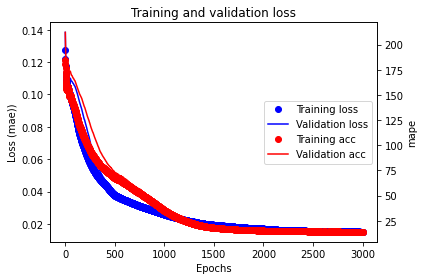

In [21]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

accuracy = history.history['mape']
val_accuracy = history.history['val_mape']


epochs = range(1, len(loss) + 1)
fig, ax1 = plt.subplots()

l1 = ax1.plot(epochs, loss, 'bo', label='Training loss')
vl1 = ax1.plot(epochs, val_loss, 'b', label='Validation loss')
ax1.set_title('Training and validation loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss (mae))')

ax2 = ax1.twinx()
ac2= ax2.plot(epochs, accuracy, 'o', c="red", label='Training acc')
vac2= ax2.plot(epochs, val_accuracy, 'r', label='Validation acc')
ax2.set_ylabel('mape')

lns = l1 + vl1 + ac2 + vac2
labs = [l.get_label() for l in lns]
ax2.legend(lns, labs, loc="center right")
fig.tight_layout()
#fig.savefig("acc+loss_drop.pdf")
fig.show()

## Probability density distribution

In [22]:
y0_low = class_data0_low[:,0]
A0 = class_data0_low
A0[:,9] = A0[:,13]
x0_low = class_data0_low[:,1:10]

In [23]:
y_pred_low = model.predict(x0_low)

In [24]:
y0_high = class_data0_high[:,0]
A0 = class_data0_high
A0[:,9] = A0[:,13]
x0_high = class_data0_high[:,1:10]

In [25]:
y_pred_high = model.predict(x0_high)

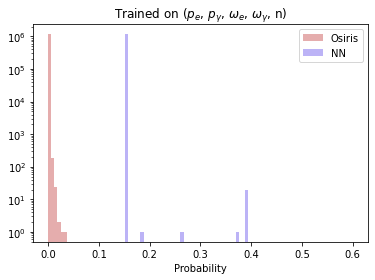

In [26]:
from matplotlib import pyplot
y0_high = np.array(y0_high)
bins = np.linspace(0, 0.6, 100)
pyplot.hist(y0_high, bins, color = 'indianred', alpha=0.5, label='Osiris')
pyplot.hist(y_pred_high, bins, color = 'mediumslateblue', alpha=0.5, label='NN')
pyplot.legend(loc='upper right')
pyplot.xlabel('Probability')
pyplot.yscale('log')
pyplot.title('Trained on ($p_e$, $p_{\gamma}$, $\omega_e$, $\omega_{\gamma}$, n)')
pyplot.show()

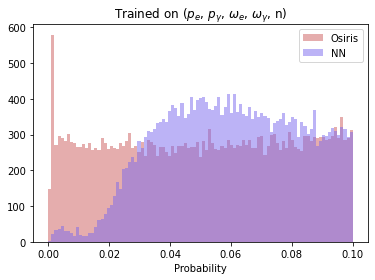

In [27]:
from matplotlib import pyplot
y0_low = np.array(y0_low)
bins = np.linspace(0, 0.1, 100)
pyplot.hist(y0_low, bins, color = 'indianred', alpha=0.5, label='Osiris')
pyplot.hist(y_pred_low, bins, color = 'mediumslateblue', alpha=0.5, label='NN')
pyplot.legend(loc='upper right')
pyplot.xlabel('Probability')
#pyplot.yscale('log')
pyplot.title('Trained on ($p_e$, $p_{\gamma}$, $\omega_e$, $\omega_{\gamma}$, n)')
pyplot.show()

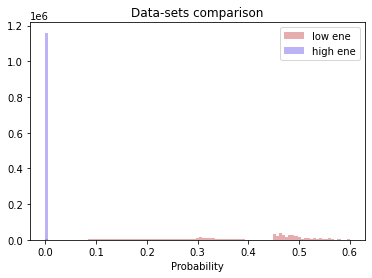

In [28]:
from matplotlib import pyplot
y_low = np.array(y_low)
y_high = np.array(y_high)
bins = np.linspace(0, 0.6, 100)
pyplot.hist(y_low, bins, color = 'indianred', alpha=0.5, label='low ene')
pyplot.hist(y0_high, bins, color = 'mediumslateblue', alpha=0.5, label='high ene')
pyplot.legend(loc='upper right')
pyplot.xlabel('Probability')
#pyplot.yscale('log')
pyplot.title('Data-sets comparison')
pyplot.show()